In [14]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(tidyr)
options(repr.plot.width=20, repr.plot.height=15)

In [15]:

Importantareas=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_Important_Areas.csv")
#coverage=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_ecoregion_MPA.csv")
#IBA=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/IBA_coverage_ecoregion_MPA.csv")
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")

In [16]:
Importantareas=merge(Importantareas, region, by=c("NAME", "Ecoregion_ID"))

In [17]:
Importantareas=as.data.frame(sapply(Importantareas, function(x) gsub("-1", "NA", x)))

In [18]:
colnames(Importantareas)

[1] "NAME"         "Ecoregion_ID" "PCT_IBA_MPA"  "PCT_IBA_FPA"  "PCT_BIA_MPA" 
[6] "PCT_BIA_FPA"  "Region"

In [19]:
Importantareas=pivot_longer(Importantareas,
  cols=c('PCT_IBA_MPA','PCT_IBA_FPA','PCT_BIA_MPA','PCT_BIA_FPA'),
  names_to = c("IA","PA"),
    names_prefix = "PCT_",
    names_sep = "_",
  values_to = "percent"
         )

In [20]:
Importantareas$percent=as.numeric(Importantareas$percent)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [30]:
Importantareas[Importantareas$IA=="IBA",]

NAME,Ecoregion_ID,Region,IA,PA,percent
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,East Coast,IBA,MPA,9.011312e+01
Acadian Atlantic,1,East Coast,IBA,FPA,1.190957e-02
Alaskan/Fjordland Pacific,2,Alaska,IBA,MPA,6.438497e+00
Alaskan/Fjordland Pacific,2,Alaska,IBA,FPA,6.235547e-01
Aleutian Archipelago,3,Alaska,IBA,MPA,2.395016e+00
Aleutian Archipelago,3,Alaska,IBA,FPA,2.141009e+00
American Samoa,4,Pacific Islands,IBA,MPA,8.654674e+01
American Samoa,4,Pacific Islands,IBA,FPA,3.877283e-02
Arctic Basin,5,Alaska,IBA,MPA,NA


In [34]:
Importantareas[Importantareas$IA=="BIA"&is.na(Importantareas$percent),]

NAME,Ecoregion_ID,Region,IA,PA,percent
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
American Samoa,4,Pacific Islands,BIA,MPA,NA
American Samoa,4,Pacific Islands,BIA,FPA,NA
Arctic Basin,5,Alaska,BIA,MPA,NA
Arctic Basin,5,Alaska,BIA,FPA,NA
Beaufort/Chukchi Seas,6,Alaska,BIA,FPA,NA
Caribbean Sea,8,Gulf of Mexico/Caribbean,BIA,MPA,NA
Caribbean Sea,8,Gulf of Mexico/Caribbean,BIA,FPA,NA
Guam and Mariannas,11,Pacific Islands,BIA,MPA,NA
Guam and Mariannas,11,Pacific Islands,BIA,FPA,NA


Warning message:
“Removed 23 rows containing missing values (geom_bar).”


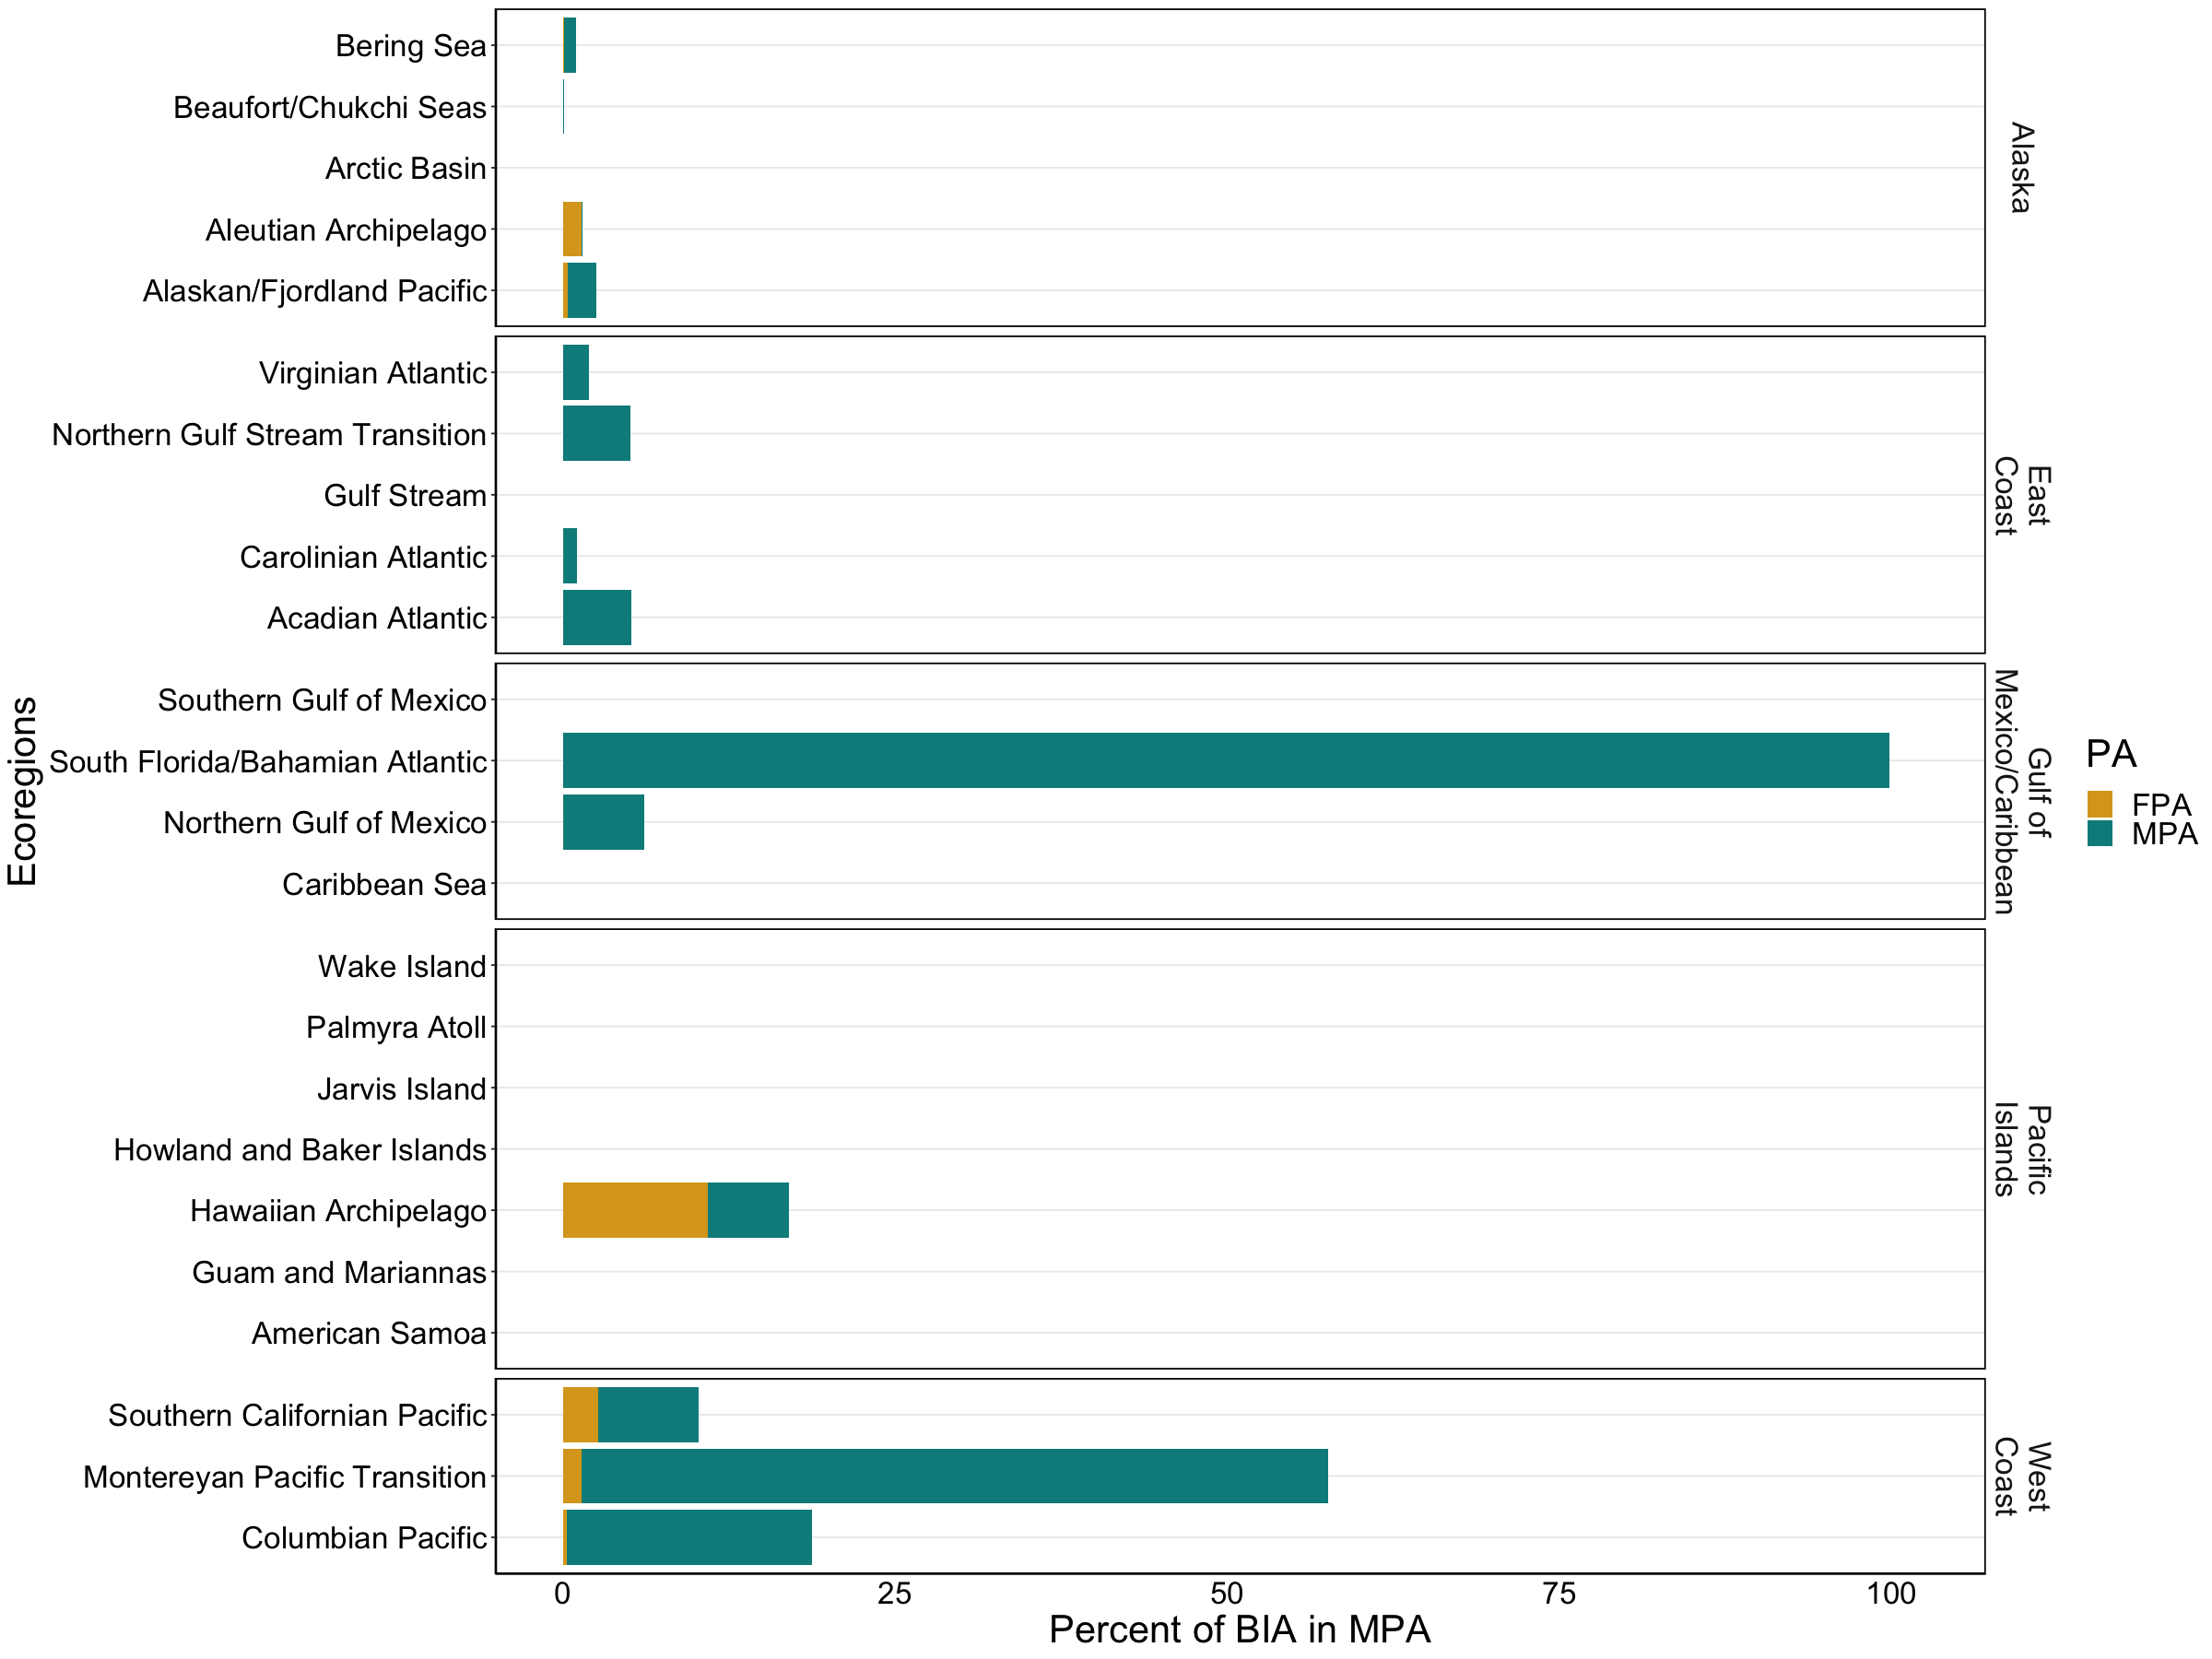

In [23]:
ggplot(Importantareas[Importantareas$IA=="BIA",], aes(y=NAME, x=percent)) +
#geom_text(x=102, aes(label=PCT.of.ER.Covered.by.CWC.Habitat),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of BIA in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,102)+
#coord_flip()+
ylab("Ecoregions")

In [24]:
ggsave(file="~/Documents/Lenfest/FigureS4_BIA.pdf", width=15, height=10)

Warning message:
“Removed 23 rows containing missing values (geom_bar).”


Warning message:
“Removed 9 rows containing missing values (geom_bar).”


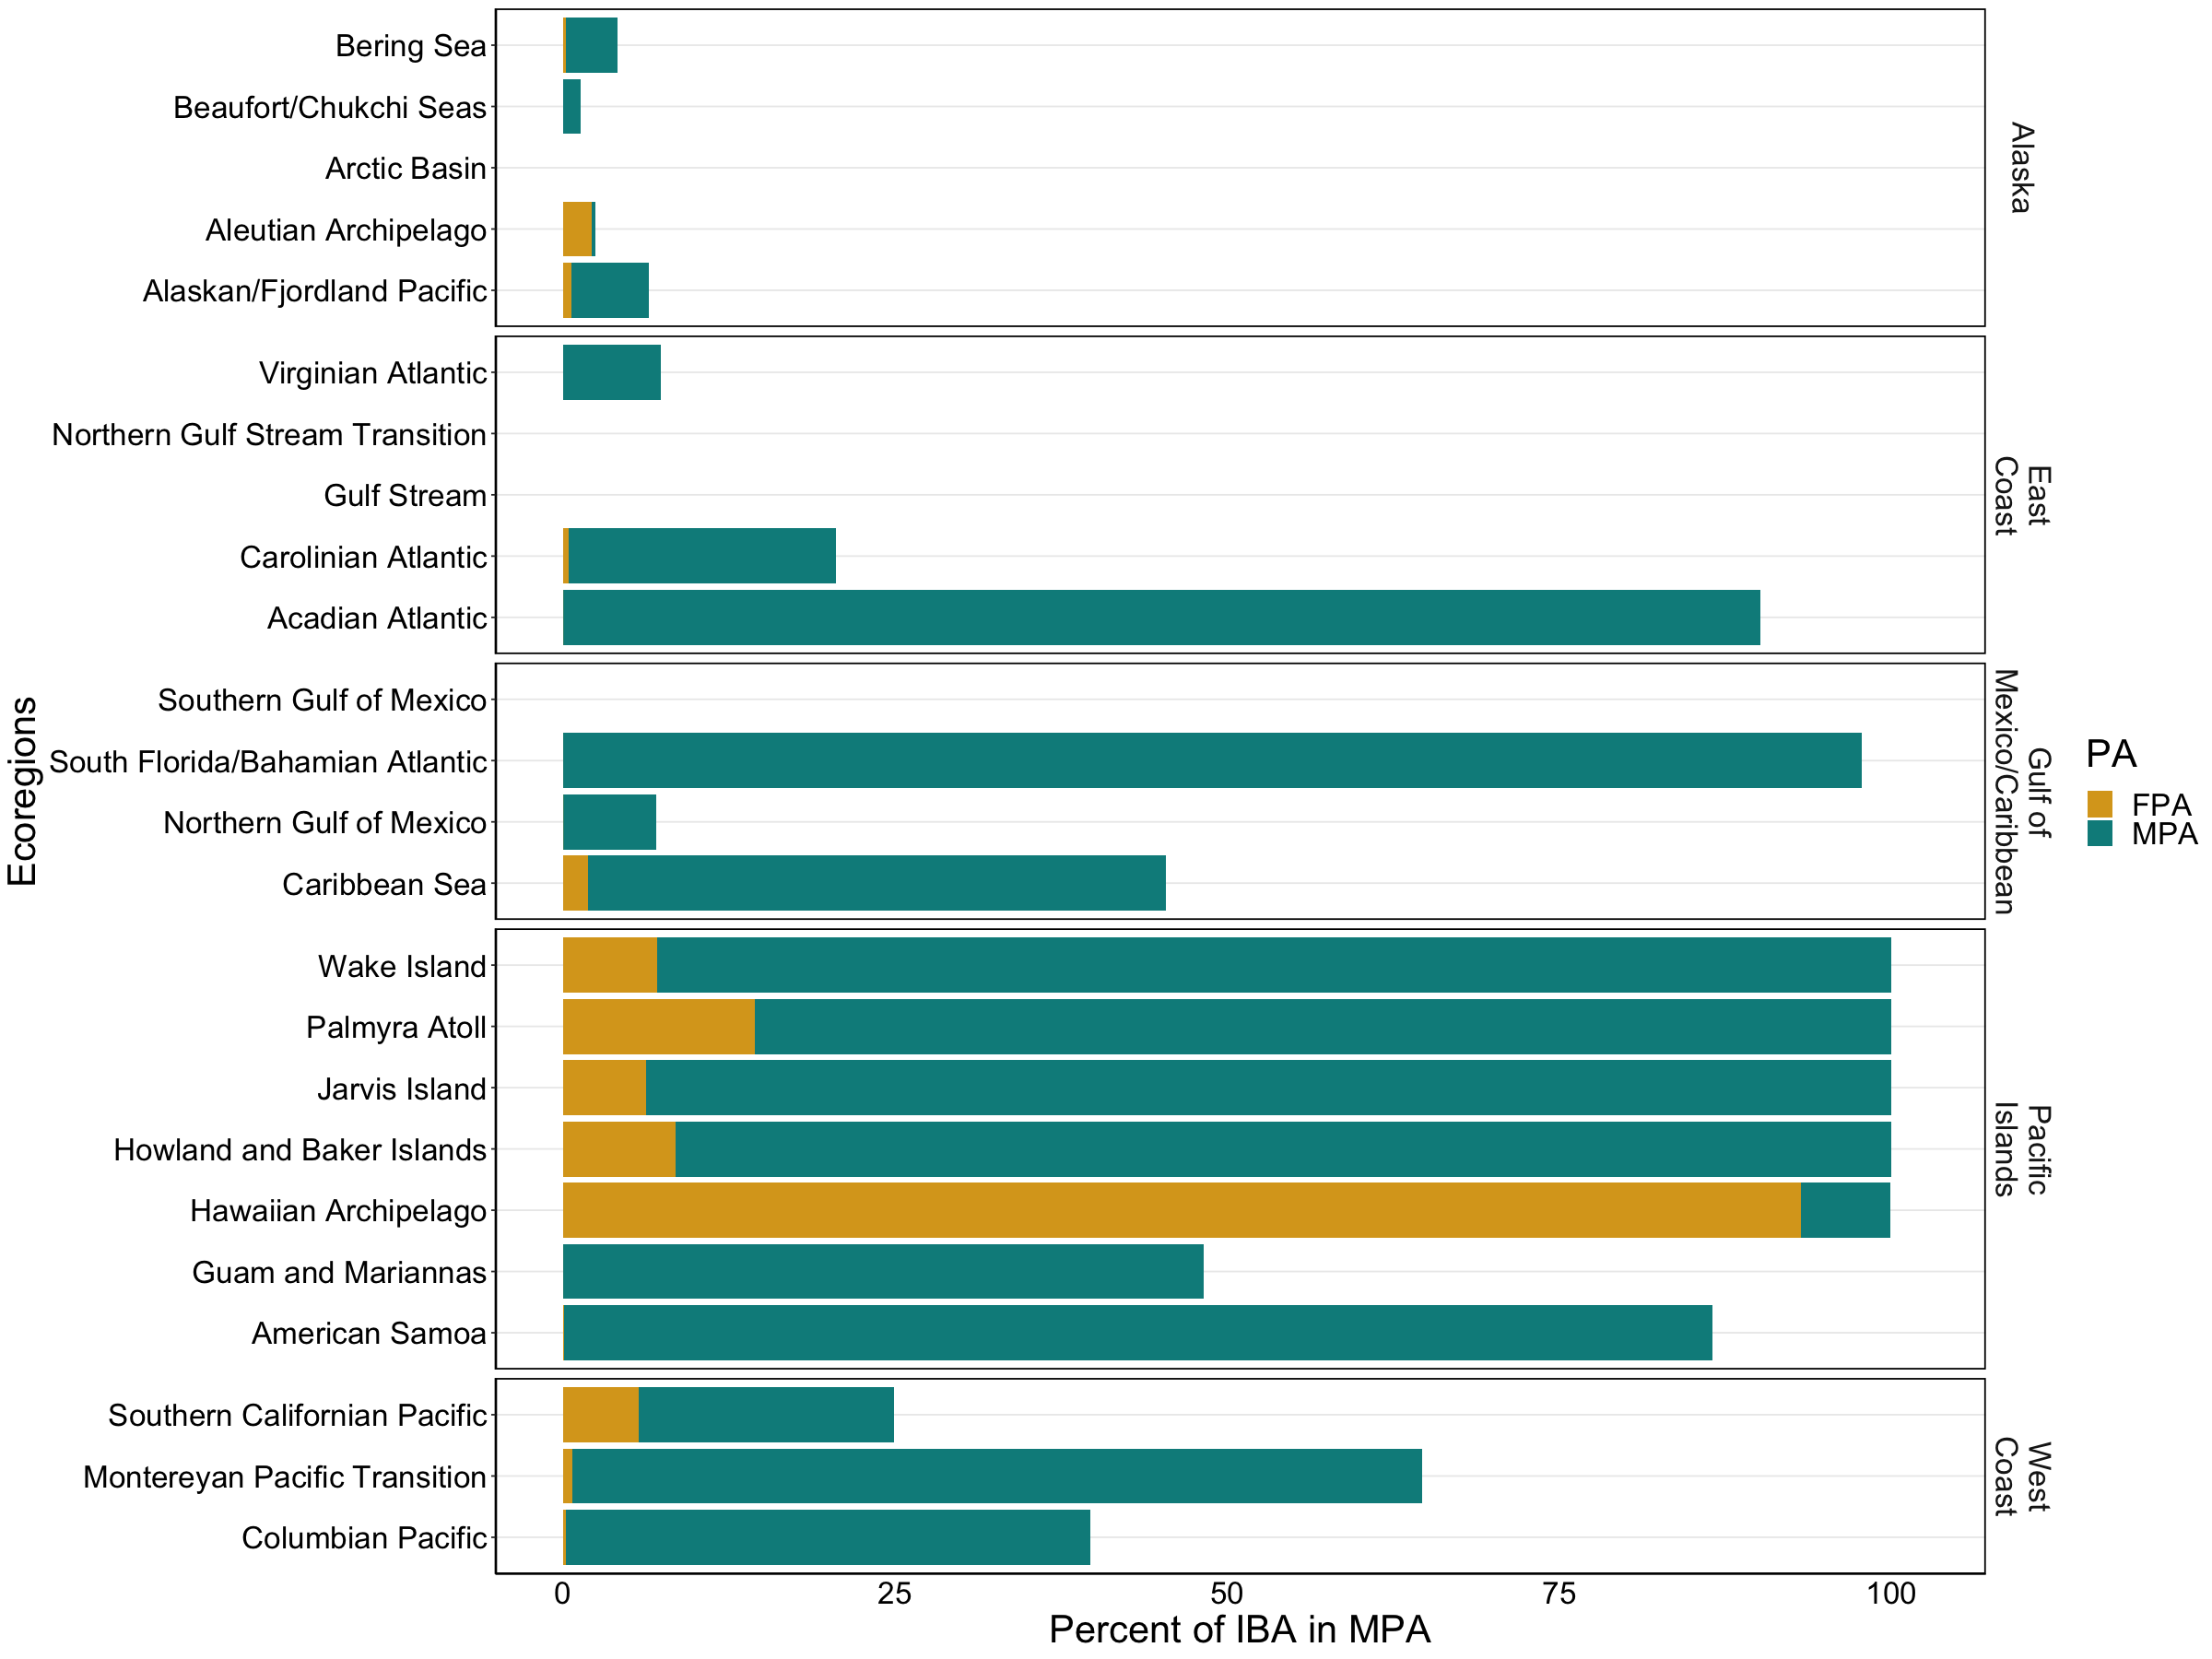

In [25]:
ggplot(Importantareas[Importantareas$IA=="IBA",], aes(y=NAME, x=percent)) +
#geom_text(x=102, aes(label=PCT.of.ER.Covered.by.CWC.Habitat),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of IBA in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,102)+
#coord_flip()+
ylab("Ecoregions")

In [26]:
ggsave(file="~/Documents/Lenfest/FigureS4_IBA.pdf", width=15, height=10)

Warning message:
“Removed 9 rows containing missing values (geom_bar).”


In [20]:
write.csv(Importantareas, file="~/Documents/Lenfest/Plot_CSV_v2/Importantareas.csv")

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


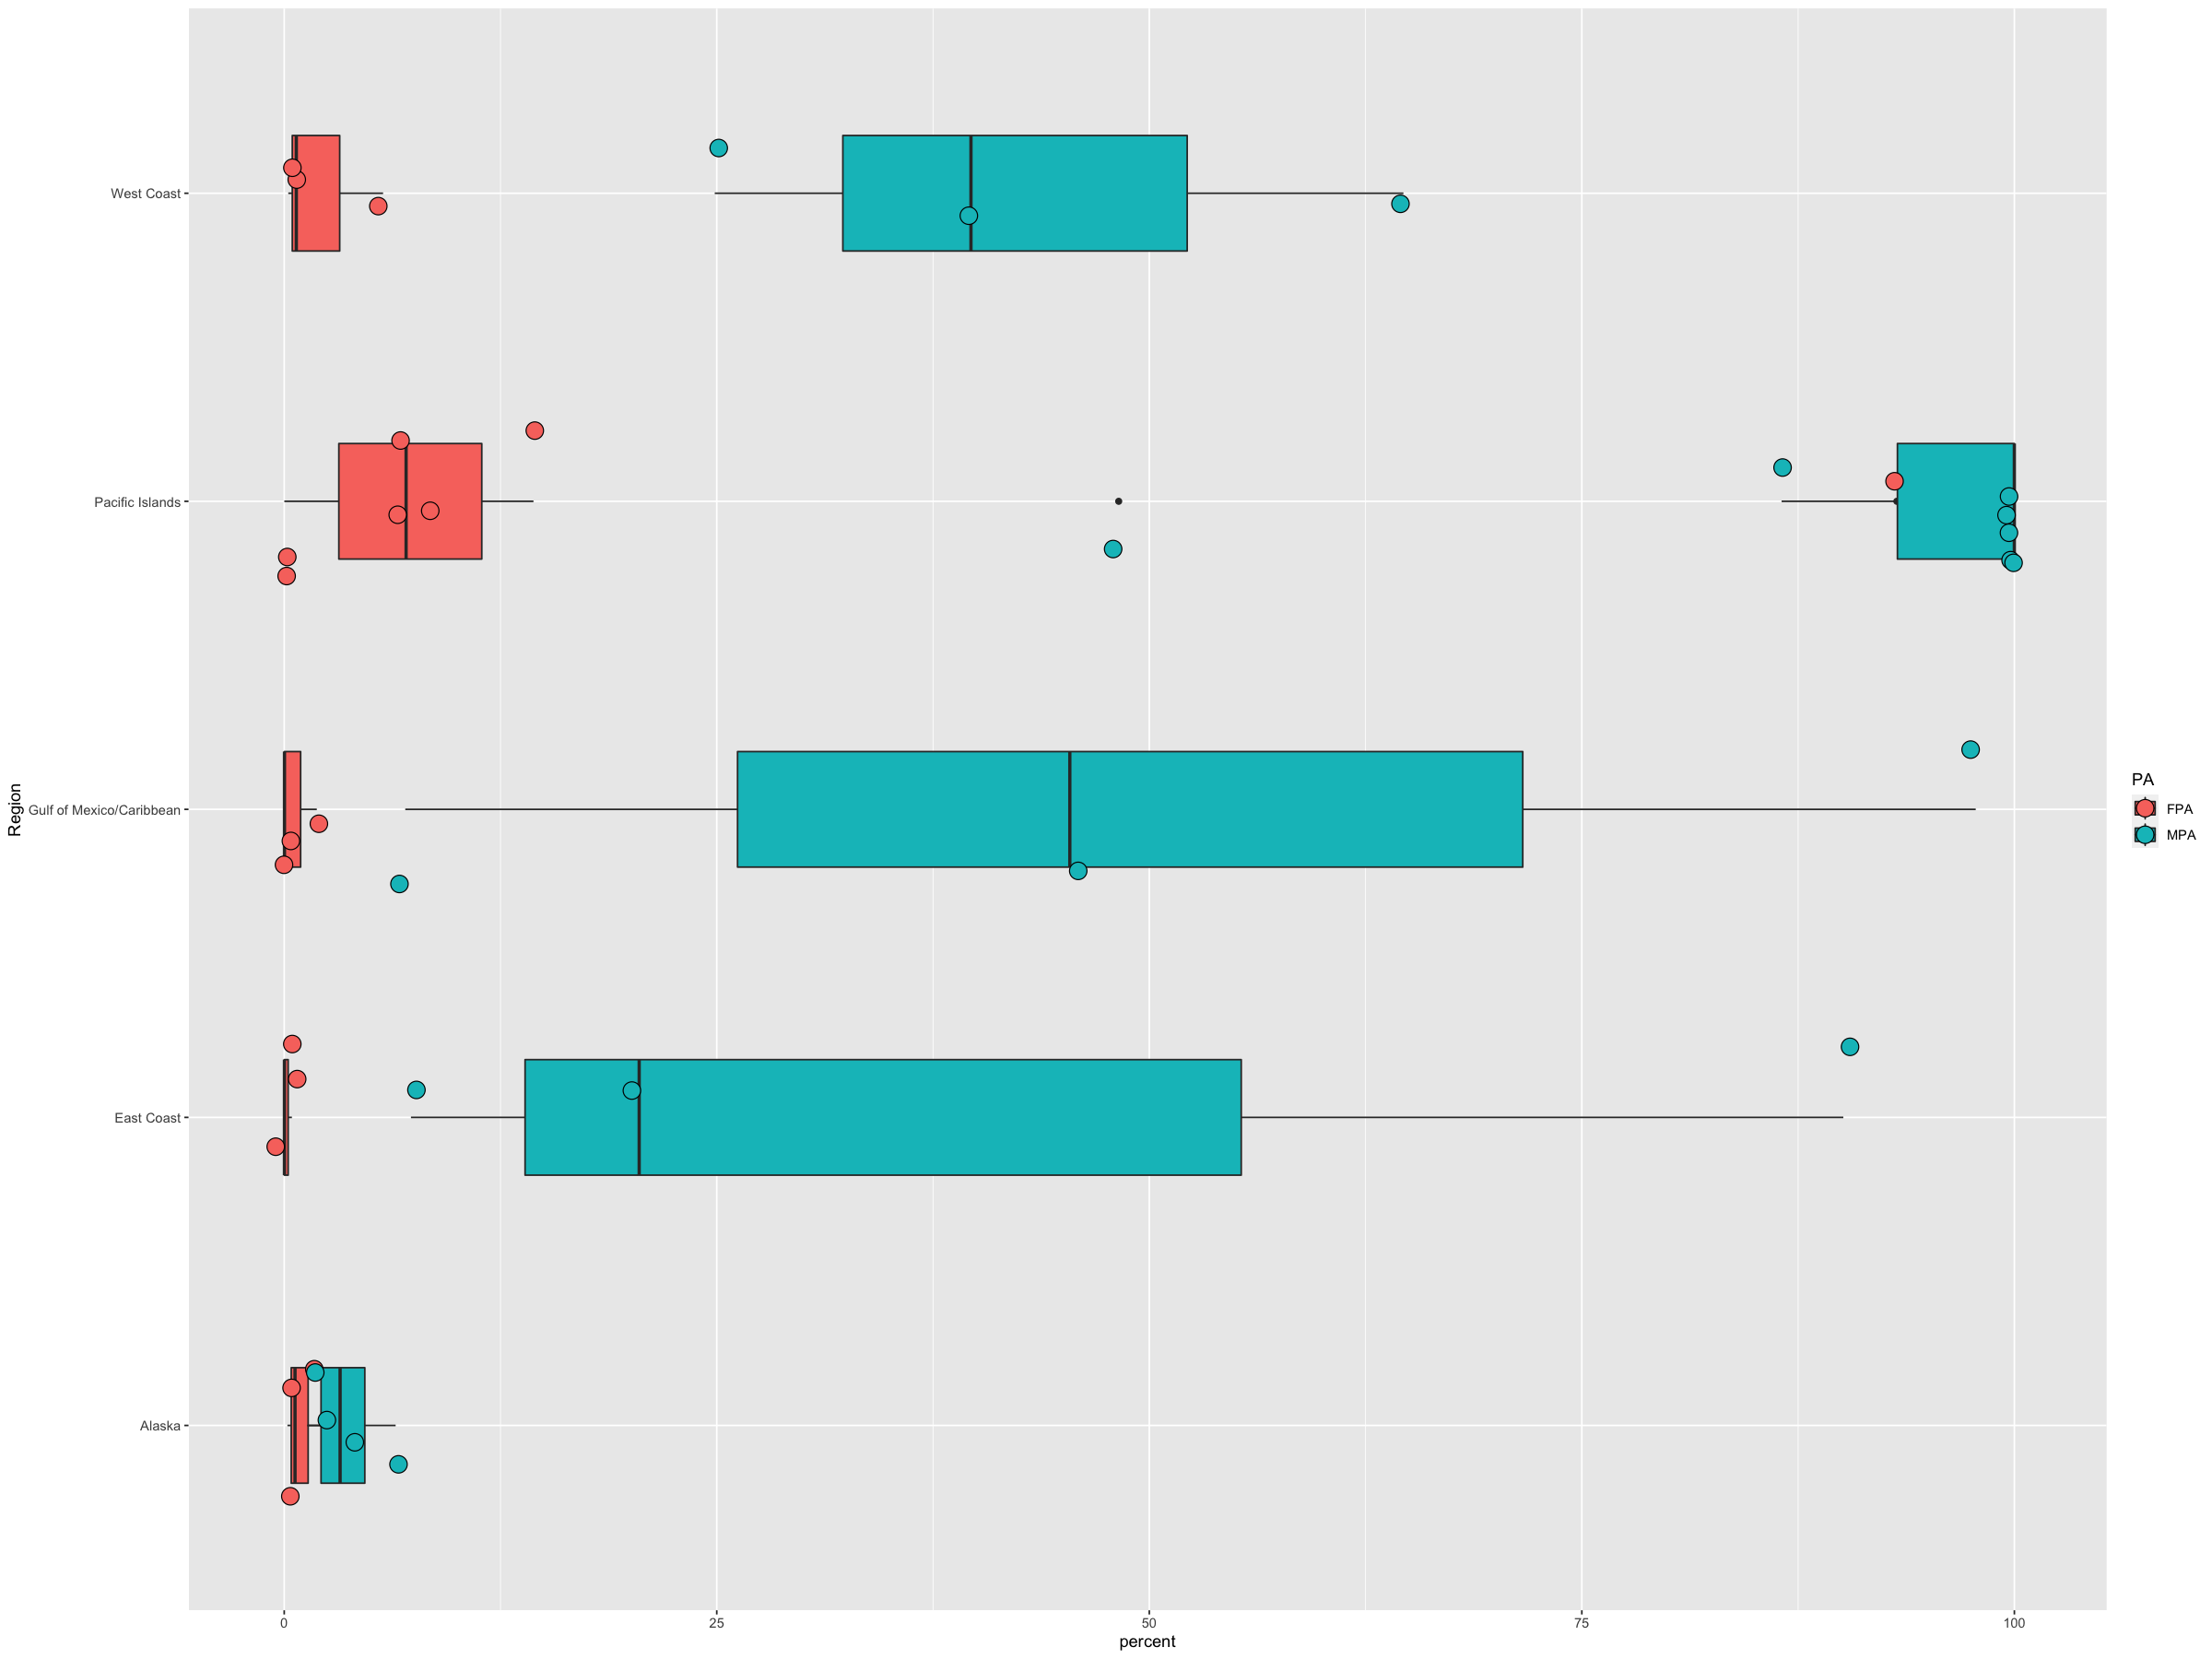

In [59]:
ggplot(Importantareas[Importantareas$IA=="IBA",], aes(y=Region, x=percent, fill=PA))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)



In [64]:
options(repr.plot.width=20, repr.plot.height=4)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


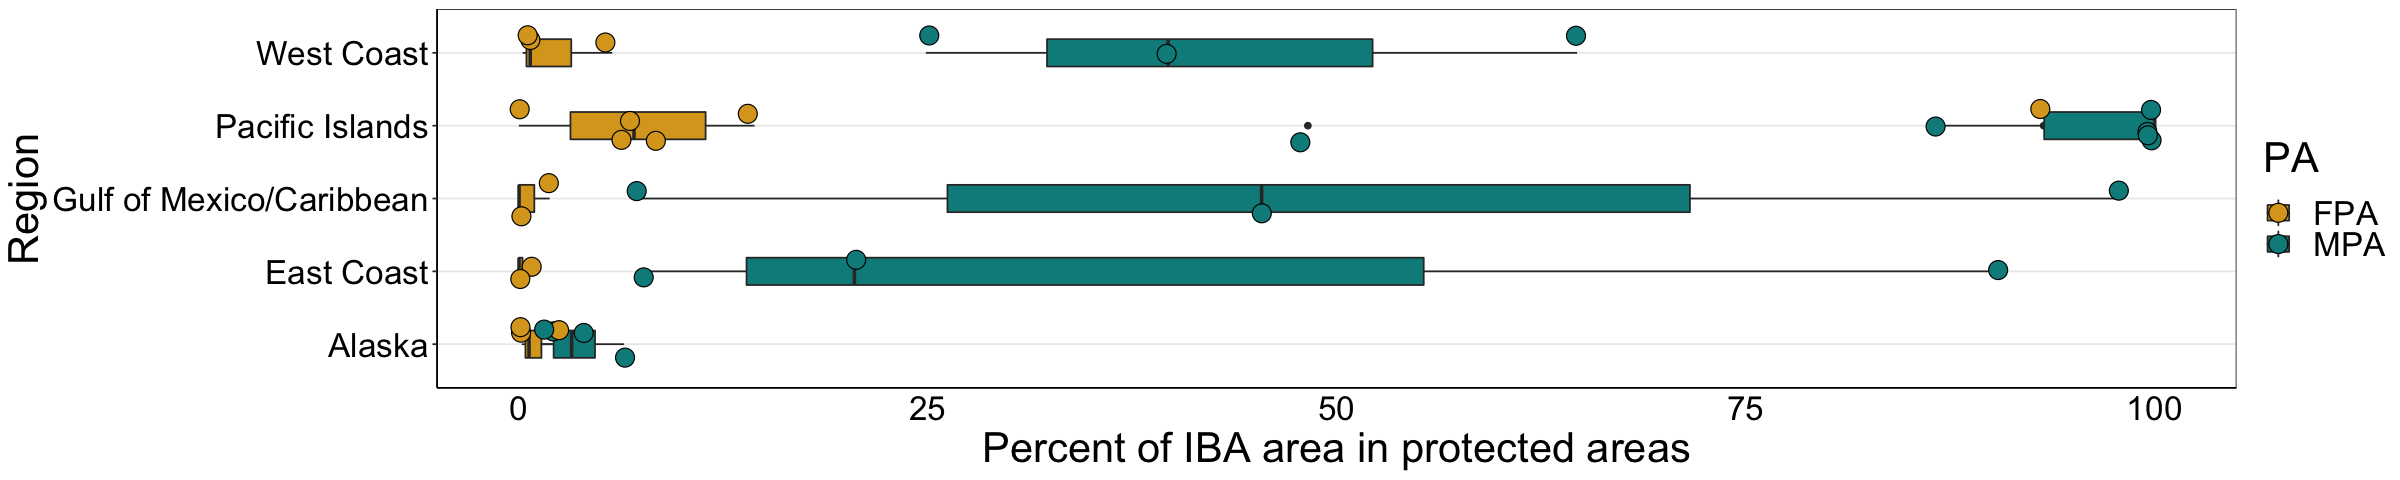

In [65]:
ggplot(Importantareas[Importantareas$IA=="IBA",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
xlim(0,100)+
labs(x="Percent of IBA area in protected areas")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )

Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”


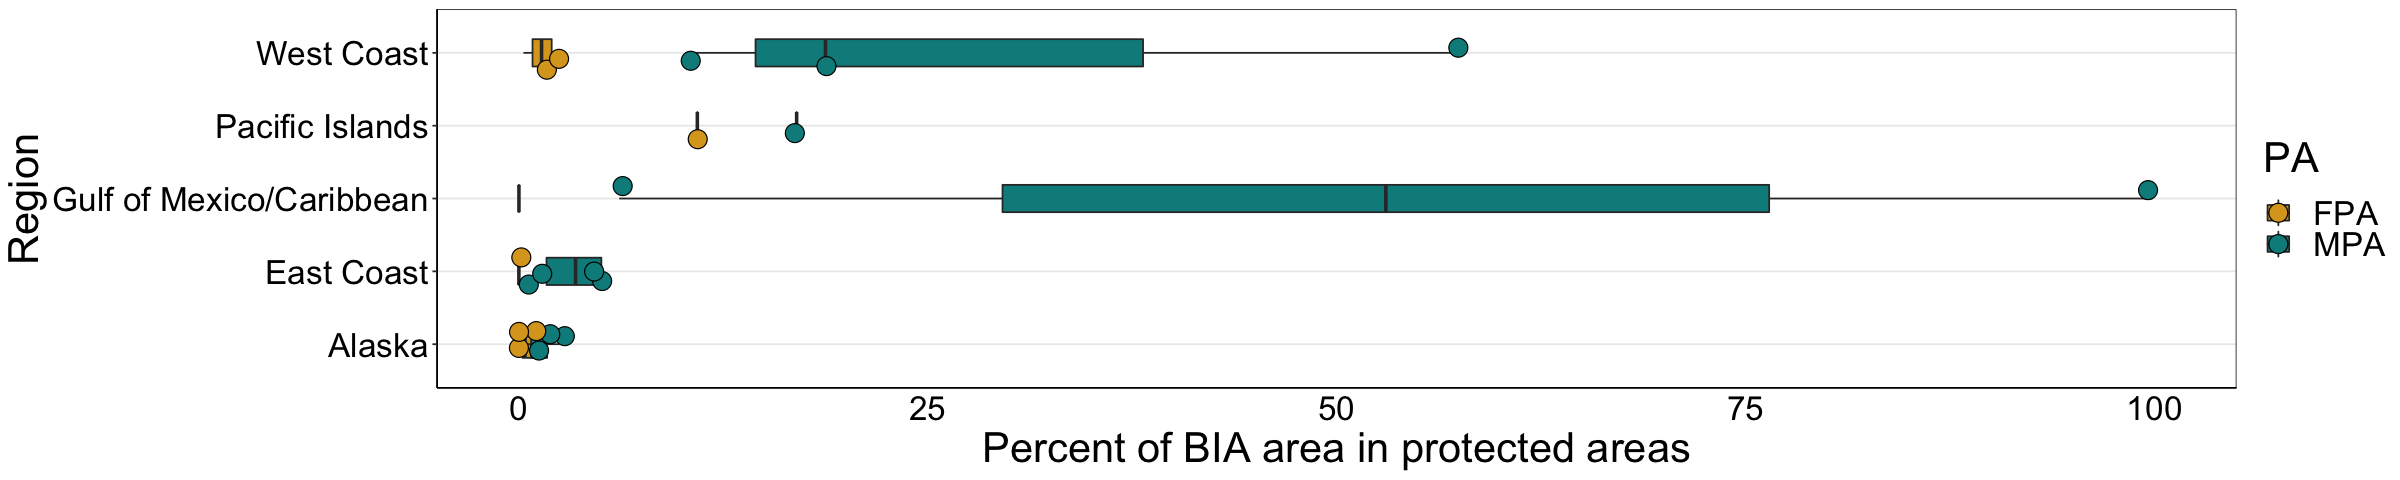

In [66]:
ggplot(Importantareas[Importantareas$IA=="BIA",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
xlim(0,100)+
labs(x="Percent of BIA area in protected areas")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )